In [294]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

In [268]:
testdata = pd.read_csv("E:/testingdata_new.csv")
traindata = pd.read_csv("E:/trainingdata_new.csv")
predictiondata =pd.read_csv("E:/prediction_data.csv")

In [269]:
#x_train = traindata[['DebtPS','Debt2Eq','CurrentR','FCFPS','PE','PS','PB','EV2EBITDA','PM','EBITDA','Cash','MinorityInt','MkCap','Leverage','RevGrowth','ROIC','DilEPS','R3MEQI','NDebt2CF','NI2Profit']]
#x_test = testdata[['DebtPS','Debt2Eq','CurrentR','FCFPS','PE','PS','PB','EV2EBITDA','PM','EBITDA','Cash','MinorityInt','MkCap','Leverage','RevGrowth','ROIC','DilEPS','R3MEQI','NDebt2CF','NI2Profit']]

x_train = traindata[['Debt2Eq','PE','PS','PB','EV2EBITDA','PM','EBITDA','Cash','MkCap','NDebt2CF','NI2Profit']]
x_test = testdata[['Debt2Eq','PE','PS','PB','EV2EBITDA','PM','EBITDA','Cash','MkCap','NDebt2CF','NI2Profit']]

y_train = traindata['Bought']
y_test = testdata['Bought']
#predictiondata = predictiondata[['DebtPS','Debt2Eq','CurrentR','FCFPS','PE','PS','PB','EV2EBITDA','PM','EBITDA','Cash','MinorityInt','MkCap','Leverage','RevGrowth','ROIC','DilEPS','R3MEQI','NDebt2CF','NI2Profit']]


In [270]:
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test)
y_test = np.array(y_test).reshape(-1,1)

In [5]:
#x_train = np.array(x_train).T
#y_train = np.array(y_train).T
#x_train = x_train.reshape((1,20,len(y_train)))
#y_train = y_train.reshape((1,len(y_train)))


In [86]:
#x_test = np.array(x_test).T
#y_test = np.array(y_test).T
#x_test = x_test.reshape((1,20,len(y_test)))
#y_test = y_test.reshape((1,len(y_test)))

LSTM

In [11]:
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
#model.add(LSTM(len(y_train),return_sequences=False))
#model.add(Dense(120465))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=100,
          batch_size=50,verbose=2)

Epoch 1/100
3s - loss: 4.1350 - acc: 0.7407
Epoch 2/100
3s - loss: 4.1496 - acc: 0.7398
Epoch 3/100
3s - loss: 4.1365 - acc: 0.7406
Epoch 4/100
3s - loss: 4.1466 - acc: 0.7400
Epoch 5/100
3s - loss: 4.1142 - acc: 0.7420
Epoch 6/100
3s - loss: 4.1749 - acc: 0.7382
Epoch 7/100
4s - loss: 4.1430 - acc: 0.7402
Epoch 8/100
3s - loss: 4.1688 - acc: 0.7386
Epoch 9/100
4s - loss: 4.0623 - acc: 0.7453
Epoch 10/100
4s - loss: 3.7798 - acc: 0.7630
Epoch 11/100
3s - loss: 3.7709 - acc: 0.7636
Epoch 12/100
3s - loss: 3.7907 - acc: 0.7623
Epoch 13/100
3s - loss: 3.7811 - acc: 0.7629
Epoch 14/100
4s - loss: 3.7599 - acc: 0.7643
Epoch 15/100
3s - loss: 3.7926 - acc: 0.7622
Epoch 16/100
3s - loss: 3.7872 - acc: 0.7626
Epoch 17/100
3s - loss: 3.7702 - acc: 0.7636
Epoch 18/100
4s - loss: 3.7732 - acc: 0.7634
Epoch 19/100
3s - loss: 3.7724 - acc: 0.7635
Epoch 20/100
3s - loss: 3.7793 - acc: 0.7631
Epoch 21/100
3s - loss: 3.7941 - acc: 0.7621
Epoch 22/100
3s - loss: 3.7772 - acc: 0.7632
Epoch 23/100
3s - l

In [12]:
test_pre = model.predict(x_test)

In [13]:
test_pre = test_pre.reshape(1,-1)

In [14]:
test_pre = test_pre[0]

In [10]:
#test_result = [1 if x >0.5 else 0 for x in test_pre]

In [11]:
#y_test = y_test.reshape(1,-1)
#y_test = y_test[0]

In [51]:
confusion_matrix(y_test,test_pre)

array([[54626,     8],
       [ 1010,     0]], dtype=int64)

Random Forest

In [97]:
clf = RandomForestClassifier(max_depth=10, random_state=None,n_estimators = 500)

In [98]:
clf.fit(x_train,y_train)

C:\Users\Peilin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [99]:
rf_res = clf.predict(x_test)

In [100]:
confusion_matrix(y_test,rf_res)

array([[54634,     0],
       [ 1010,     0]], dtype=int64)

Traditional Neural Network

In [275]:
mlp = MLPClassifier(hidden_layer_sizes=(200,200,200), max_iter=100, alpha=0.0001, verbose=10,  random_state=21,tol=0.0000001) #128 128 128 -> 28

In [276]:
mlp.fit(x_train,y_train)

C:\Users\Peilin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.72412744
Iteration 2, loss = 0.63428975
Iteration 3, loss = 0.65512557
Iteration 4, loss = 0.62595938
Iteration 5, loss = 0.60043623
Iteration 6, loss = 0.63699532
Iteration 7, loss = 0.61613796
Iteration 8, loss = 0.52392835
Iteration 9, loss = 0.21986513
Iteration 10, loss = 0.12775353
Iteration 11, loss = 0.10947580
Iteration 12, loss = 0.09303446
Iteration 13, loss = 0.08205027
Iteration 14, loss = 0.08121412
Iteration 15, loss = 0.07822185
Iteration 16, loss = 0.08473085
Iteration 17, loss = 0.08020021
Iteration 18, loss = 0.07489247
Iteration 19, loss = 0.07755664
Iteration 20, loss = 0.07597606
Iteration 21, loss = 0.07680397
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200, 200, 200), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=21, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [277]:
mlp_res = mlp.predict(x_test)

In [278]:
confusion_matrix(y_test,mlp_res)

array([[54633,     1],
       [ 1009,     1]], dtype=int64)

Isolation Forest

In [295]:
iso = IsolationForest(n_estimators=1000, max_samples=128)

In [296]:
iso.fit(x_train,y_train)

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples=128, n_estimators=1000, n_jobs=1, random_state=None,
        verbose=0)

In [297]:
iso_res = mlp.predict(x_test)

In [298]:
confusion_matrix(y_test,iso_res)

array([[54633,     1],
       [ 1009,     1]], dtype=int64)

In [126]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [ ]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label = label)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')

In [134]:
def plot_prc_curve(fpr,tpr,label=None):
  plt.plot(fpr,tpr,linewidth=2,label = label)
  plt.axis([0,1,0,1])
  plt.xlabel('Recall')
  plt.ylabel('Precision')

In [279]:
lstm_res_prob = model.predict_proba(x_test)

ValueError: Error when checking : expected dense_4_input to have shape (None, 20) but got array with shape (55644, 11)

In [280]:
lstm_res_prob

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

In [281]:
fpr_lstm,tpr_lstm,thresholds_lstm = roc_curve(y_test,lstm_res_prob)

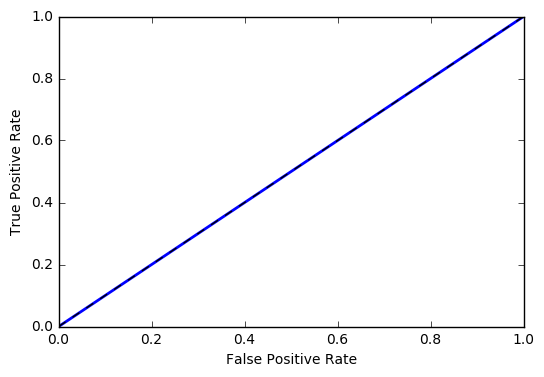

In [282]:
plot_roc_curve(fpr_lstm,tpr_lstm)
plt.show()

In [283]:
mlp_res_prob = mlp.predict_proba(x_test)

In [284]:
mlp_res_prob = pd.DataFrame(mlp_res_prob)[1]

In [285]:
fpr,tpr,thresholds = roc_curve(y_test,mlp_res_prob)

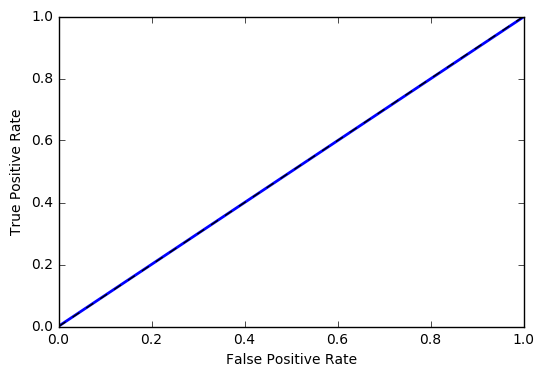

In [286]:
plot_roc_curve(fpr,tpr)
plt.show()

In [255]:
precision_mlp, recall_mlp, thresholds_mlp = precision_recall_curve(y_test,mlp_res_prob)

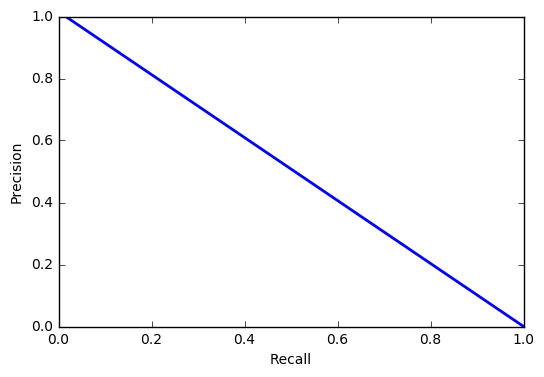

In [293]:
plot_prc_curve(precision_mlp,recall_mlp)
plt.show()

In [287]:
mlp_tr_prob = mlp.predict_proba(x_train)
mlp_tr_prob = pd.DataFrame(mlp_tr_prob)[1]

In [288]:
fpr_mlp_tr,tpr_mlp_tr,thresholds_tr = roc_curve(y_train,mlp_tr_prob)

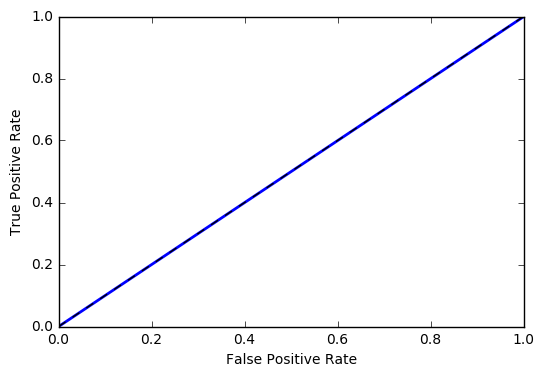

In [292]:
plot_roc_curve(fpr_mlp_tr,tpr_mlp_tr)
plt.show()

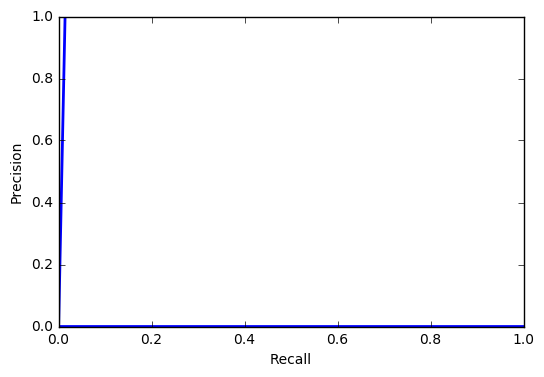

In [291]:
precision_mlp_tr, recall_mlp_tr, thresholds_mlp_tr = precision_recall_curve(y_train,mlp_tr_prob)
plot_prc_curve(precision_mlp_tr,recall_mlp_tr)
plt.show()